In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

%matplotlib inline

In [2]:
df = pd.read_csv('epa-sea-level.csv')

In [3]:
df.tail() #showing dataset

Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
129  2009                  8.586614           8.311024           8.862205   
130  2010                  8.901575           8.618110           9.185039   
131  2011                  8.964567           8.661417           9.267717   
132  2012                  9.326772           8.992126           9.661417   
133  2013                  8.980315           8.622047           9.338583   

     NOAA Adjusted Sea Level  
129                 8.046354  
130                 8.122973  
131                 8.053065  
132                 8.457058  
133                 8.546648

In [4]:
df['CSIRO Adjusted Sea Level'].isnull().any() #no null values in column

False

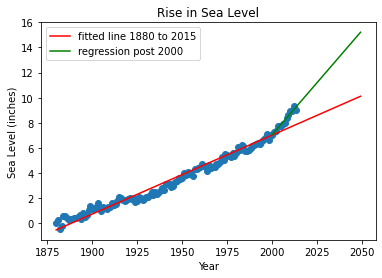

In [6]:
x=df['Year']; y=df['CSIRO Adjusted Sea Level']
slope, intercept, r_value, p_value, std_err = linregress(x, y) 

plt.title("Rise in Sea Level")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.scatter(x,y)

predicted_years=pd.Series(range(2014,2050,1))

pred_x=x.append(predicted_years)

plt.plot(pred_x, intercept + slope*pred_x, 'r', label='fitted line 1880 to 2015')

rec_df=df[df['Year']>1999]
rec_x=rec_df['Year']; rec_y=rec_df['CSIRO Adjusted Sea Level']


rec_slope, rec_intercept, rec_r_value, rec_p_value, rec_std_err = linregress(rec_x, rec_y)
rec_fut_years=pred_x[pred_x>1999]
plt.plot(rec_fut_years, rec_intercept + rec_slope*rec_fut_years, 'g', label='regression post 2000')

plt.legend()